## Introduction  
  

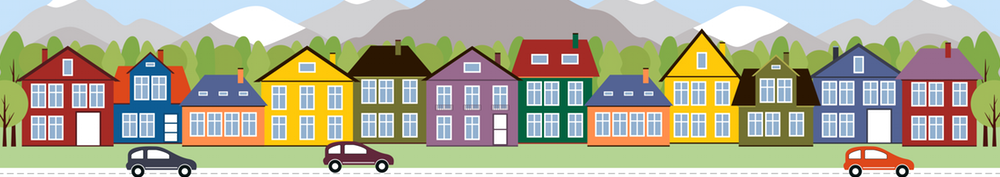

Ames Housing Datset includes 80 potential features directly related to property sales. It focuses on the quality and quantity of many physical attributes of the property. Most of the variables are exactly the type of information that a typical home buyer would want to know about a potential property(e.g. When was it built? How big is the lot? etc..). 


In this version,we are mainly focus on Data Cleaning. In this case, we are dealing with imputing data. Generally, we may tend to drop columns those are having more than 50 percent of data. But, if we would carefully read the document(http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and get the proper insight of the data, we will find that it can be imputed with appropriate values. 

Our aim is to clean data but keeping the shape and size of whole dataset same.

Let's take a look.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns',100, 'max_rows',100)
sns.set(context='notebook', style='whitegrid', palette='deep')
from sklearn.impute import KNNImputer

In [2]:
from IPython.display import display_html
def disp_side(*args):
    html_str='  '
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

## Loading Data

In [3]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
dataset = pd.concat([train,test],axis = 0,ignore_index =True,sort=False)

train.shape,test.shape,dataset.shape

((1460, 81), (1459, 80), (2919, 81))

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Data Cleaning

This dataset contains lots of missing values in many columns. we have applied different strategy for imputing based on data understanding.

We have observed 34 columns which contains null values. 

In [5]:
nullcnt = dataset.isnull().sum().to_frame()
nulldf = nullcnt[nullcnt[0]>0].sort_values(0,ascending=False)
nulldf.drop('SalePrice',axis=0,inplace=True)
print('Number of columns containing null:',nulldf.shape[0])
print('Number of columns containing nulls in 1000s :',(nulldf[0]>1000).sum())
print('Number of columns containing nulls in 100s : ',((1000>nulldf[0])&(nulldf[0] >100)).sum())
print('Number of columns containing nulls in 10s :',((100>nulldf[0]) &(nulldf[0] >10)).sum())
print('Number of columns containing nulls less than 10 :',(nulldf[0]<10).sum())
disp_side(nulldf[:12],nulldf[12:24],nulldf[24:])

Number of columns containing null: 34
Number of columns containing nulls in 1000s : 5
Number of columns containing nulls in 100s :  6
Number of columns containing nulls in 10s : 7
Number of columns containing nulls less than 10 : 16


,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageYrBlt,159
GarageFinish,159
GarageQual,159


In above list, most of the columns are related to Garage and Basement(i.e.Bsmt). We will analyse columns in each category together. Because some columns may help us to impute other columns.  

### Imputing data in Basement related columns

In [6]:
bsmcols =  [col for col in dataset.columns if 'Bsmt' in col]
dataset[bsmcols].isnull().sum()

BsmtQual        81
BsmtCond        82
BsmtExposure    82
BsmtFinType1    79
BsmtFinSF1       1
BsmtFinType2    80
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
dtype: int64

In above list, TotalBsmtSF(Total Basement in square foot) is key column to impute other columns as well as it only has one missing value. we can set NaNs in categorical as NAv(Not available) and numeric columns to 0.

In [7]:
dataset[dataset['TotalBsmtSF'] == 0][bsmcols].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
39,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
90,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
102,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
156,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [8]:
# if 'TotalBsmtSF' is 0 or not available then apply following strategy
rows = (dataset['TotalBsmtSF'] == 0) | (dataset['TotalBsmtSF'].isnull())
dataset.loc[rows,['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']] = 'NAv'
dataset.loc[rows,['BsmtFinSF1','BsmtFinSF2','BsmtFullBath','BsmtHalfBath']] = 0
dataset.loc[rows,['BsmtUnfSF','TotalBsmtSF']] = 0
dataset[bsmcols].isnull().sum()            

BsmtQual        2
BsmtCond        3
BsmtExposure    3
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    1
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [9]:
# Remaining nulls are in categorical or discrete columns. Let's replace it with mode
remain = ['BsmtCond','BsmtExposure','BsmtFinType2','BsmtQual']
modes = dataset[remain].mode().values.tolist()[0]
mapdict = dict(zip(remain,modes))

dataset.fillna(mapdict,inplace=True)

In [10]:
dataset[bsmcols].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Imputing data in Garage related columns:

In [11]:
garcols =  [col for col in dataset.columns if 'Garage' in col]
dataset[garcols].isnull().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

Descriptions of columns:


Garage Type (Nominal): Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
Garage Yr Blt (Discrete): Year garage was built
		
Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
Garage Cars (Discrete): Size of garage in car capacity

Garage Area (Continuous): Size of garage in square feet

Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageArea and GarageCars has only 1 missing value. Remaining categorical columns has missing value if these two columns are zero. It means Garage is not available fot that corresponding property. So, here is the strategy, If these two columns are zero and other columns are NaN then we put NAv(Not Available) in categorical columns and 0 in 'GarageYrBlt'

In [12]:
garcat = ['GarageCond','GarageFinish','GarageQual','GarageType']
rows = (dataset['GarageArea'] == 0) & (dataset['GarageCars'] == 0) & (dataset[garcat].isnull().all(axis=1))
dataset.loc[rows,garcat] = 'NAv'
dataset.loc[rows,'GarageYrBlt'] = 0
dataset[garcols].isnull().sum()

GarageType      0
GarageYrBlt     2
GarageFinish    2
GarageCars      1
GarageArea      1
GarageQual      2
GarageCond      2
dtype: int64

All above nulls are present in only two rows. Presence of some quantities indicates the availablity of garage in the property.Let's analyze it carefully and impute data accordingly.

In [13]:
dataset[dataset[garcols].isnull().any(axis=1)][garcols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2576,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# calculating mode for categorical columns with GarageType 'Detached' 
dataset.loc[dataset['GarageType'] == 'Detchd',['GarageCond','GarageFinish','GarageQual']].mode()

,GarageCond,GarageFinish,GarageQual
0,TA,Unf,TA


In [15]:
#  For index 2126 and 2576 we will replace null in following ways

# 'GarageYrBlt' -> 'YearBuilt'
dataset.loc[2126,'GarageYrBlt'] = dataset.loc[2126,'YearBuilt']
dataset.loc[2576,'GarageYrBlt'] = dataset.loc[2576,'YearBuilt']

# categorical and discrete columns -> mode calculated as above
dataset.loc[[2126,2576],['GarageCond','GarageQual']] = 'TA'
dataset.loc[[2126,2576],'GarageFinish'] = 'Unf'
dataset.loc[2576,['GarageCars']] = dataset.loc[dataset['GarageType'] == 'Detchd','GarageCars'].mode().values

# numeric col -> mean
dataset.loc[2576,['GarageArea']] = dataset.loc[dataset['GarageType'] == 'Detchd','GarageArea'].mean()


In [16]:
dataset[garcols].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

### Imputing data in Remaining Columns

In [17]:
null_count = dataset.isnull().sum()
nulldf = null_count[null_count>0]
nulldf.drop('SalePrice',axis = 0)

MSZoning          4
LotFrontage     486
Alley          2721
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       24
MasVnrArea       23
Electrical        1
KitchenQual       1
Functional        2
FireplaceQu    1420
PoolQC         2909
Fence          2348
MiscFeature    2814
SaleType          1
dtype: int64

Let's focus on following set of columns first

Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
 Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
 Misc Feature (Nominal): Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
 Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
       
For above columns we have following strategy for filling nulls
1. Alley and Fence are null as they are not available. Therefore impute it with NA(Not Available)
2. MasVnrType, PoolQC,MiscFeature will be set to NA(Not Available) if fireplaces, PoolArea,MiscVal are 0 as it indicates no availability of that feature for that particular property

In [18]:
dataset.fillna({'Alley':'NAv','Fence':'NAv'},inplace = True)
dataset.loc[dataset['MasVnrArea'] == 0,'MasVnrType'] = 'NAv'
dataset.loc[dataset['Fireplaces'] == 0,'FireplaceQu'] = 'NAv'
dataset.loc[dataset['MiscVal'] == 0,'MiscFeature'] = 'NAv'
dataset.loc[dataset['PoolArea']==0,'PoolQC'] = 'NAv'

In [19]:
null_count = dataset.isnull().sum()
nulldf = null_count[null_count>0]
nulldf.drop('SalePrice',axis = 0)

MSZoning         4
LotFrontage    486
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      24
MasVnrArea      23
Electrical       1
KitchenQual      1
Functional       2
PoolQC           3
MiscFeature      1
SaleType         1
dtype: int64

In [20]:
# Lets replace nulls in remainin categorical and discrete columns with mode value. 
# These column's null count are less than 5.
remain_cols = ['Electrical','Exterior1st','Exterior2nd','Functional','KitchenQual','MiscFeature','PoolQC','SaleType','Utilities']
modes = dataset[remain_cols].mode()
mapdict = dict(zip(remain_cols,modes))
dataset.fillna(mapdict,inplace=True)

'MasVnrType' and 'MasVnrArea' not yet imputed completely. Let's carefully look at its description.

Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
Mas Vnr Area (Continuous): Masonry veneer area in square feet

It could be possible that Masonary Veneer may not be present for particular propery if MasVnrType is None. Based on this knowledge we would replace null with NAv for MasVnrType and with 0 for MasVnrArea 

In [21]:
dataset[dataset[['MasVnrArea','MasVnrType']].isnull().any(axis=1)][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN
1691,NaN,NaN
1706,NaN,NaN


In [22]:
rows = dataset[['MasVnrType','MasVnrArea']].isnull().all(axis=1)
dataset.loc[rows,['MasVnrType','MasVnrArea']] = 0
# row 2610 where MasVnr is present
dataset.at[2610,'MasVnrType'] = dataset['MasVnrType'].mode()


### Dealing with nulls in MSZoning:

MSZoning indicates the zone(commercial/residential/agriculture..etc) under which property comes. It could have relation with neighborhood.To understand this, we have generated pivot table in which columns are neighborhood values and indexes are MSzoning values. Each cell in this df indicates count(no. of properties) for corresponding zone and neighborhood. 

If we will look at following df, each neighborhood column has particular MSZoning with very high frequency. Our current misssing MSzoning contains neighborhood 'IDOTRR' and 'Mitchel' so based on below df. We would replace corresponding MSZoning with 'RM' and 'RL' respectively.

In [23]:
pd.crosstab(dataset['MSZoning'],dataset['Neighborhood'])

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
MSZoning,,,,,,,,,,,,,,,,,,,,,,,,,
C (all),0,0,0,0,0,0,0,0,0,22,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0
FV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,0,0,0
RH,0,0,0,0,0,0,2,2,0,0,0,0,7,0,0,0,0,0,9,0,6,0,0,0,0
RL,25,0,0,43,44,253,91,180,165,0,0,104,436,23,131,71,165,39,38,148,119,43,51,72,24
RM,3,10,30,65,0,14,10,12,0,68,37,9,0,0,0,0,1,198,0,3,0,0,0,0,0


In [24]:
dataset[dataset['MSZoning'].isnull()][['MSZoning','Neighborhood']]

,MSZoning,Neighborhood
1915,NaN,IDOTRR
2216,NaN,IDOTRR
2250,NaN,IDOTRR
2904,NaN,Mitchel


In [25]:
dataset.fillna({'MSZoning':'RM'},inplace=True)
dataset.at[2904,'MSZoning'] = 'RL'

### Dealing with nulls in LotFrontage:
LotFrontage is numeric column contains 486 missing values. We must be extra careful to impute such large number of values. Setting up constant value may affect seriously on performance of our model. Removing rows may cause unnecessary reduction of our train data.

We have two choices: first,remove column and second, impute data with appropriate value still mainitaining the distribution shape same. We would not go with first choice as this column has considerable correlation with 'SalePrice'.Let's think of second choice. We will use KNN imputer which uses k nearest neighbors to impute missing value.

In [26]:
before = dataset['LotFrontage'].copy()
cormat = dataset.corr()['LotFrontage']
# cormat.drop(['SalePrice','LotFrontage'],axis = 0,inplace=True)
cormat_before = cormat[cormat> 0.3].to_frame()


cormat_before


,LotFrontage
LotFrontage,1.000000
LotArea,0.489896
TotalBsmtSF,0.353090
1stFlrSF,0.458247
GrLivArea,0.382462
TotRmsAbvGrd,0.349513
GarageCars,0.310427
GarageArea,0.359808
SalePrice,0.351799


In [27]:

features = dataset.select_dtypes(np.number).columns.drop('SalePrice')

imputer = KNNImputer(n_neighbors=5,weights = 'uniform')
dataset[features] = imputer.fit_transform(dataset[features])

,LotFrontage
LotFrontage,1.000000
LotArea,0.489896
TotalBsmtSF,0.353090
1stFlrSF,0.458247
GrLivArea,0.382462
TotRmsAbvGrd,0.349513
GarageCars,0.310427
GarageArea,0.359808
SalePrice,0.351799
,LotFrontage


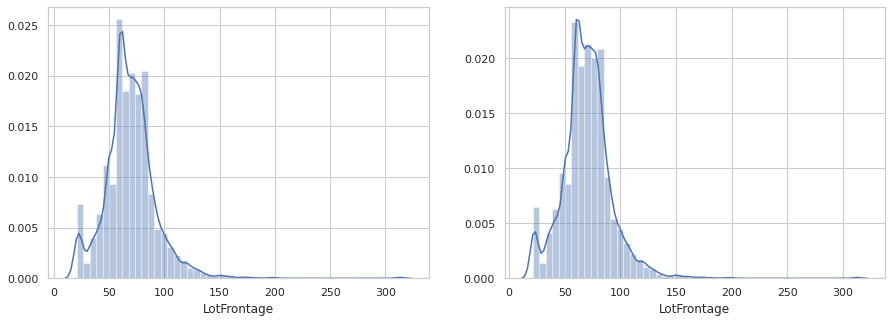

In [28]:
cormat = dataset.corr()['LotFrontage']
# cormat.drop(['SalePrice','LotFrontage'],axis = 0,inplace=True)
cormat_after = cormat[cormat> 0.3].to_frame()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.distplot(before,ax=ax1)
sns.distplot(dataset['LotFrontage'],ax=ax2)

disp_side(cormat_before,cormat_after)

We have succeded in imputing these large amount of data while maintained significant correlation matrix(corr>0.3) and the original distribution shape almost same as before.

### Seperating train and test data:

In [29]:
cleaned_train = dataset[:1460].copy()
cleaned_test = dataset[1460:].copy()
cleaned_test.drop('SalePrice',axis=1,inplace=True)

In [30]:
nulls = cleaned_train.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [31]:
nulls = cleaned_test.isnull().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [32]:
# Storing for future use
cleaned_train.to_csv('ctrain.csv',index = False)
cleaned_test.to_csv('ctest.csv',index=False)

This cleaned data will be used further for analysis and predictive modelling. In the next section we will focus on EDA and Feature Engineering